In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import joblib

In [2]:
data=pd.read_csv("D:\FCI\Machine Learning\Wine Quality\winequality-red.csv")

In [3]:
data['quality']=[1 if y>=7 else 0 for y in data['quality']]
X = data.drop('quality', axis=1)
y = data['quality']
X_res, y_res = SMOTE(random_state=0).fit_resample(X,y)

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [6]:
#st = StandardScaler()
#X_train = st.fit_transform(X_train)
#X_test = st.transform(X_test)

In [7]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# Low Variance Filter

It is a feature selection technique. Difference between feature selection and dimensionality reduction is that in feature selection the resulting features must be a subset of the original features while in dimensionality reduction, the resulting features don't have to be a subset of the original features. PCA is considered a dimensionality reduction technique. 

Variance is a statistical concept that is calculated by the following formula:
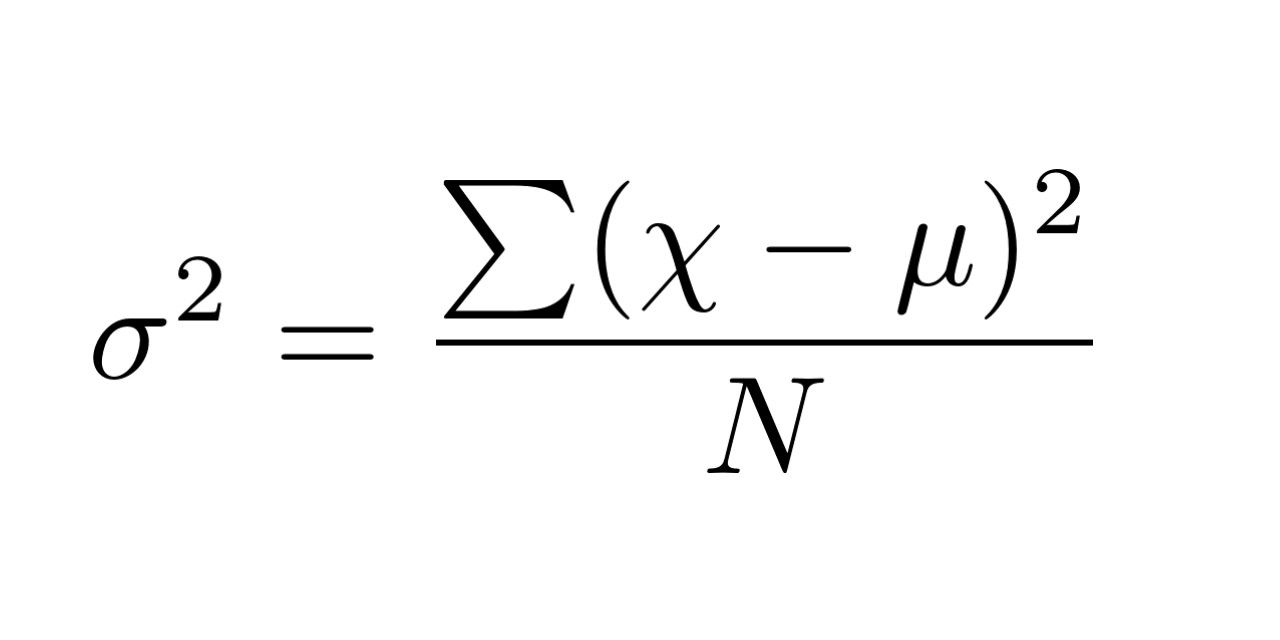
where x is a feature value, mu is the mean, and N is the number of samples

In [8]:
vt=VarianceThreshold(threshold=0.9999999999999997)

In [9]:
vt.fit_transform(X_train).shape

(2211, 5)

In [10]:
vt=VarianceThreshold(threshold=0.9999999999999999)
vt.fit_transform(X_train).shape

(2211, 5)

In [11]:
vt=VarianceThreshold(threshold=0.99999999999999994)
vt.fit_transform(X_train).shape

(2211, 5)

In [12]:
vt=VarianceThreshold(threshold=0.9999999999999999444)
vt.fit_transform(X_train).shape

(2211, 5)

In [13]:
vt=VarianceThreshold(threshold=0.99999999999999995)
vt.fit_transform(X_train).shape

(2211, 5)

In [14]:
X_train.shape

(2211, 11)

In [15]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2750,7.200000,0.360000,0.460000,2.100000,0.074000,24.000000,44.000000,0.995340,3.400000,0.850000,11.000000
1849,8.528464,0.353238,0.474021,1.955874,0.146339,5.960843,16.000000,0.994080,3.178825,0.752349,12.500000
651,9.800000,0.880000,0.250000,2.500000,0.104000,35.000000,155.000000,1.001000,3.410000,0.670000,11.200000
261,7.000000,0.975000,0.040000,2.000000,0.087000,12.000000,67.000000,0.995650,3.350000,0.600000,9.400000
1253,7.900000,0.660000,0.000000,1.400000,0.096000,6.000000,13.000000,0.995690,3.430000,0.580000,9.500000
...,...,...,...,...,...,...,...,...,...,...,...
1638,8.382916,0.352592,0.305508,1.723417,0.061937,5.297497,15.234168,0.995465,3.328100,0.782150,11.495582
1095,9.400000,0.400000,0.470000,2.500000,0.087000,6.000000,20.000000,0.997720,3.150000,0.500000,10.500000
1130,9.100000,0.600000,0.000000,1.900000,0.058000,5.000000,10.000000,0.997700,3.180000,0.630000,10.400000
1294,8.200000,0.635000,0.100000,2.100000,0.073000,25.000000,60.000000,0.996380,3.290000,0.750000,10.900000


In [16]:
vt=VarianceThreshold(threshold=0.9999999999999999)
vt.fit_transform(X_train).shape

(2211, 5)

In [17]:
vt.get_support()

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True])

In [18]:
X_train.shape

(2211, 11)

In [19]:
data=data.drop(['fixed acidity','residual sugar'],axis=1)

In [20]:
data

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# Training the models on the selected features

### Logistic Regression

In [21]:
log=LogisticRegression()
log.fit(X_train, y_train)
y_pred1=log.predict(X_test)

D:\python 3.10.6\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
accuracy_score(y_test, y_pred1)

0.8155515370705244

In [23]:
precision_score(y_test, y_pred1)

0.7836879432624113

In [24]:
recall_score(y_test, y_pred1)

0.8435114503816794

In [25]:
f1_score(y_test, y_pred1)

0.8125

### SVC

In [26]:
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred2=svm.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred2)

0.72875226039783

In [28]:
precision_score(y_test, y_pred2)

0.6772151898734177

In [29]:
recall_score(y_test, y_pred2)

0.816793893129771

In [30]:
f1_score(y_test, y_pred2)

0.740484429065744

### KNN Classifier

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred3)

0.8571428571428571

In [33]:
precision_score(y_test, y_pred3)

0.7815384615384615

In [34]:
recall_score(y_test, y_pred3)

0.9694656488549618

In [35]:
f1_score(y_test, y_pred3)

0.8654173764906303

### Decision Tree Classifier

In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred4)

0.8969258589511754

In [38]:
precision_score(y_test, y_pred4)

0.8647686832740213

In [39]:
recall_score(y_test, y_pred4)

0.9274809160305344

In [40]:
f1_score(y_test, y_pred4)

0.8950276243093923

### Random Forest Classifier

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred5 = rf.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred5)

0.9349005424954792

In [43]:
precision_score(y_test, y_pred5)

0.8951048951048951

In [44]:
recall_score(y_test, y_pred5)

0.9770992366412213

In [45]:
f1_score(y_test, y_pred5)

0.9343065693430658

### Gradient Boosting Classifier

In [46]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred6 = gbc.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred6)

0.891500904159132

In [48]:
precision_score(y_test, y_pred6)

0.8458904109589042

In [49]:
recall_score(y_test, y_pred6)

0.9427480916030534

In [50]:
f1_score(y_test, y_pred6)

0.8916967509025271

# Visualizing Results

In [51]:
Final_Results = pd.DataFrame({'Models':['Logestic Regression', 'Support Vector Classifier', 'K-nearest Neighbor', 'Decision Tree', 'Random Forest', 'Gradient Boosting Classifier'],
                              'Accuracy':[accuracy_score(y_test, y_pred1)*100,
                                         accuracy_score(y_test, y_pred2)*100,
                                         accuracy_score(y_test, y_pred3)*100,
                                         accuracy_score(y_test, y_pred4)*100,
                                         accuracy_score(y_test, y_pred5)*100,
                                         accuracy_score(y_test, y_pred6)*100]
                             })

In [52]:
Final_Results

,Models,Accuracy
0,Logestic Regression,81.555154
1,Support Vector Classifier,72.875226
2,K-nearest Neighbor,85.714286
3,Decision Tree,89.692586
4,Random Forest,93.490054
5,Gradient Boosting Classifier,89.150090


D:\python 3.10.6\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

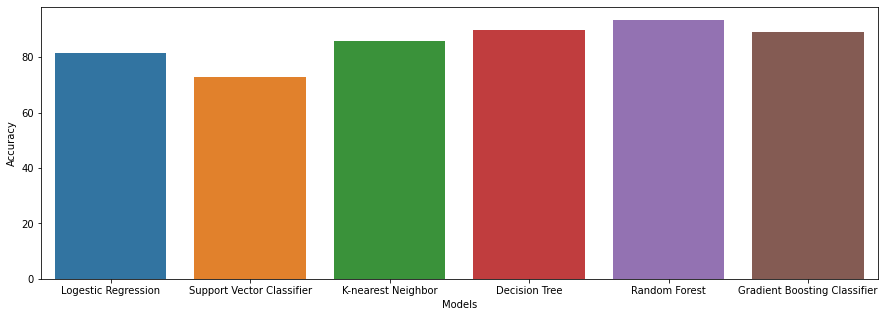

In [53]:
plt.figure(figsize=(15,5))
sns.barplot(Final_Results['Models'], Final_Results['Accuracy'])